In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
data = pd.read_csv("C:\\Users\\Tejas\\Downloads\\21. sales_data_final.csv")
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Dra,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [22]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {data[col].unique()}')

In [24]:
for col in data.columns:
    uniquevals(col)
    print()
    print("-"*75)

Details of the particular col order_id is : ['AG-2011-2040' 'IN-2011-47883' 'HU-2011-1220' ... 'MX-2014-108574'
 'MO-2014-2560' 'CA-2014-156720']

---------------------------------------------------------------------------
Details of the particular col order_date is : ['1/1/2011' '1/2/2011' '1/3/2011' ... '12/29/2014' '12/30/2014'
 '12/31/2014']

---------------------------------------------------------------------------
Details of the particular col ship_date is : ['1/6/2011' '1/8/2011' '1/5/2011' ... '1/5/2015' '1/6/2015' '1/7/2015']

---------------------------------------------------------------------------
Details of the particular col ship_mode is : ['Standard Class' 'Second Class' 'Same Day' 'First Class']

---------------------------------------------------------------------------
Details of the particular col customer_name is : ['Toby Braunhardt' 'Joseph Holt' 'Annie Thurman' 'Eugene Moren'
 'Magdelene Morse' 'Kean Nguyen' 'Ken Lonsdale' 'Lindsay Williams'
 'Larry Blacks' 'Dor

## Column-wise unique values

In [31]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

order_id: 25035 unique values
order_date: 1430 unique values
ship_date: 1464 unique values
ship_mode: 4 unique values
customer_name: 795 unique values
segment: 3 unique values
state: 1094 unique values
country: 147 unique values
market: 7 unique values
region: 13 unique values
product_id: 10292 unique values
category: 3 unique values
sub_category: 17 unique values
product_name: 3788 unique values
sales: 2246 unique values
quantity: 14 unique values
discount: 27 unique values
profit: 24575 unique values
shipping_cost: 10037 unique values
order_priority: 4 unique values
year: 4 unique values


In [34]:
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


In [133]:
data.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011


In [136]:
data.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Dra,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,12/31/2014,1/4/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [138]:
data.info

<bound method DataFrame.info of               order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  1/6/2011  Standard Class   
1        IN-2011-47883    1/1/2011  1/8/2011  Standard Class   
2         HU-2011-1220    1/1/2011  1/5/2011    Second Class   
3      IT-2011-3647632    1/1/2011  1/5/2011    Second Class   
4        IN-2011-47883    1/1/2011  1/8/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  12/31/2014  1/4/2015  Standard Class   
51286     MO-2014-2560  12/31/2014  1/5/2015  Standard Class   
51287   MX-2014-110527  12/31/2014  1/2/2015    Second Class   
51288   MX-2014-114783  12/31/2014  1/6/2015  Standard Class   
51289   CA-2014-156720  12/31/2014  1/4/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

data.columns

In [142]:
data.shape

(51290, 21)

In [144]:
data.isnull().sum().sum()

0

## ship date

In [146]:
data["ship_date"].info

<bound method Series.info of 0        1/6/2011
1        1/8/2011
2        1/5/2011
3        1/5/2011
4        1/8/2011
           ...   
51285    1/4/2015
51286    1/5/2015
51287    1/2/2015
51288    1/6/2015
51289    1/4/2015
Name: ship_date, Length: 51290, dtype: object>

In [148]:
data["ship_date"].isnull().sum()

0

In [150]:
data["ship_date"].duplicated().sum()

49826

In [152]:
data["ship_date"]= pd.to_datetime(data["ship_date"])

In [154]:
data["ship_date"].info

<bound method Series.info of 0       2011-01-06
1       2011-01-08
2       2011-01-05
3       2011-01-05
4       2011-01-08
           ...    
51285   2015-01-04
51286   2015-01-05
51287   2015-01-02
51288   2015-01-06
51289   2015-01-04
Name: ship_date, Length: 51290, dtype: datetime64[ns]>

## order date

In [157]:
data["order_date"]=pd.to_datetime(data["order_date"])

In [159]:
data["order_date"].info

<bound method Series.info of 0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: order_date, Length: 51290, dtype: datetime64[ns]>

In [161]:
data["order_date"].isnull().sum()

0

In [163]:
data["order_date"].duplicated().sum()

49860

In [97]:
data["order_date"].unique()

array(['1/1/2011', '1/2/2011', '1/3/2011', ..., '12/29/2014',
       '12/30/2014', '12/31/2014'], dtype=object)

In [99]:
data["order_date"].value_counts()

order_date
6/18/2014     135
11/18/2014    127
9/3/2014      126
11/20/2014    118
12/29/2014    116
             ... 
1/13/2013       1
11/10/2013      1
1/2/2011        1
5/27/2012       1
3/23/2014       1
Name: count, Length: 1430, dtype: int64

In [101]:
data["order_date"].describe(include=all)

count         51290
unique         1430
top       6/18/2014
freq            135
Name: order_date, dtype: object

## shipmode

In [166]:
data["ship_mode"].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [168]:
data["ship_mode"].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [170]:
data["ship_mode"].isnull().sum()

0

In [172]:
data["ship_mode"].info

<bound method Series.info of 0        Standard Class
1        Standard Class
2          Second Class
3          Second Class
4        Standard Class
              ...      
51285    Standard Class
51286    Standard Class
51287      Second Class
51288    Standard Class
51289    Standard Class
Name: ship_mode, Length: 51290, dtype: object>

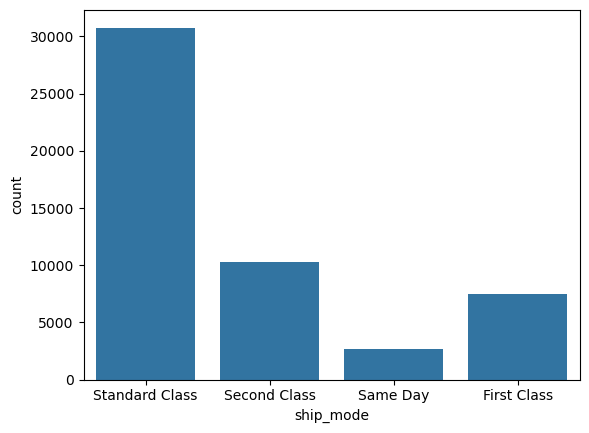

In [188]:
data["ship_mode"].value_counts()
sn.countplot(data=data,x=data["ship_mode"])
plt.show()

## segment

In [27]:
data["segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

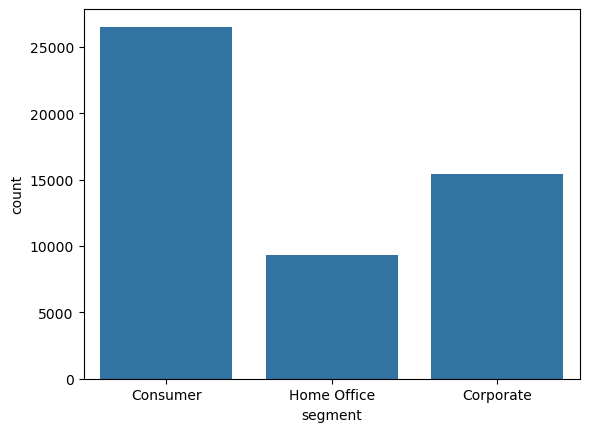

In [184]:
data["segment"].value_counts()
sn.countplot(data=data,x=data["segment"])
plt.show()

## function summary

In [32]:
### This function checks whether the input element matches one of five specific state names:

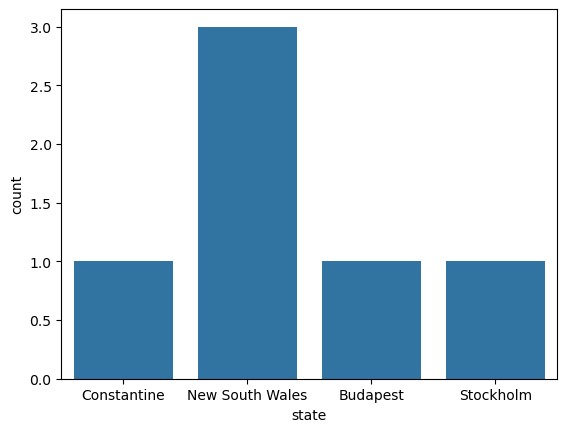

In [202]:
top = data["state"][:6]
sn.countplot(data=data,x=data["state"][:6])
plt.show()

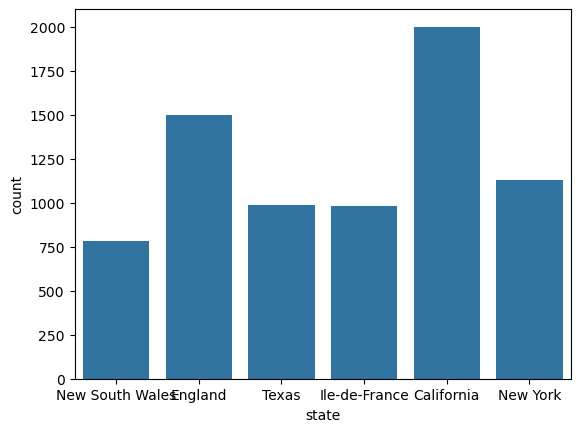

In [212]:
top_states = data["state"].value_counts().head(6).index
sn.countplot(data=data[data["state"].isin(top_states)], x="state")
plt.show()


In [34]:
data["state"].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Karaman',
       'Sikasso', 'Atsimo-Andrefana'], dtype=object)

In [36]:
This function checks whether the input element matches one of five specific state names:data["state"].value_counts()

SyntaxError: invalid syntax (782068184.py, line 1)

In [214]:
def state(element):
    if "California"==element or "England"==element or "New York"==element or "Texas"==element or "Ile-de-France"==element:
        return element
    else:
        return "other"

In [216]:
state("Rize")

'other'

In [218]:
state("California")

'California'

In [220]:
data["state2"]=data["state"].apply(state)

In [46]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,state2
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,other
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,other


In [48]:
data["state2"].value_counts()

state2
other            44696
California        2001
England           1499
New York          1128
Texas              985
Ile-de-France      981
Name: count, dtype: int64

In [50]:
data["state"].duplicated().sum()

50196

In [52]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,state2
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,other
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,other


## DATE FORMAT CHANGE

In [55]:
data['ship_date'] = pd.to_datetime(data['ship_date'], format="mixed").dt.strftime("%Y-%m-%d")

In [57]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,state2
0,AG-2011-2040,1/1/2011,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,other
1,IN-2011-47883,1/1/2011,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,other


In [59]:
data["ship_date"].head(2)

0    2011-01-06
1    2011-01-08
Name: ship_date, dtype: object

In [61]:
data["order_date"].head(2)

0    1/1/2011
1    1/1/2011
Name: order_date, dtype: object

## country

In [63]:
data["country"].info

<bound method Series.info of 0              Algeria
1            Australia
2              Hungary
3               Sweden
4            Australia
             ...      
51285    United States
51286          Morocco
51287        Nicaragua
51288           Mexico
51289    United States
Name: country, Length: 51290, dtype: object>

In [65]:
data["country"].isnull().sum()


0

In [67]:
data["country"].duplicated().sum()

51143

In [69]:
data["country"].duplicated()

0        False
1        False
2        False
3        False
4         True
         ...  
51285     True
51286     True
51287     True
51288     True
51289     True
Name: country, Length: 51290, dtype: bool

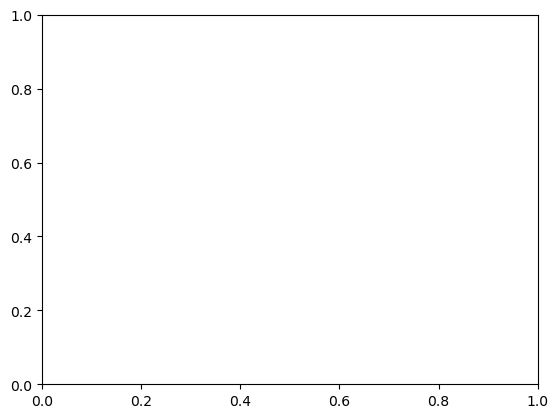

In [227]:
top_country = data["country"].value_counts().head(6).index
sn.countplot(data=data[data["country"].isin(top_states)], x="country")
plt.show()

In [11]:
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Dra,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


## market

In [13]:
data["market"].info

<bound method Series.info of 0        Africa
1          APAC
2          EMEA
3            EU
4          APAC
          ...  
51285        US
51286    Africa
51287     LATAM
51288     LATAM
51289        US
Name: market, Length: 51290, dtype: object>

In [15]:
data["market"].head()

0    Africa
1      APAC
2      EMEA
3        EU
4      APAC
Name: market, dtype: object

In [17]:
data["market"].tail()

51285        US
51286    Africa
51287     LATAM
51288     LATAM
51289        US
Name: market, dtype: object

In [19]:
data["market"].isnull().sum()

0

In [21]:
data["market"].duplicated().sum()

51283

In [27]:
data["market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [38]:
data["market"].shape

(51290,)

In [60]:
data["market"].describe(include='all')

count     51290
unique        7
top        APAC
freq      11002
Name: market, dtype: object

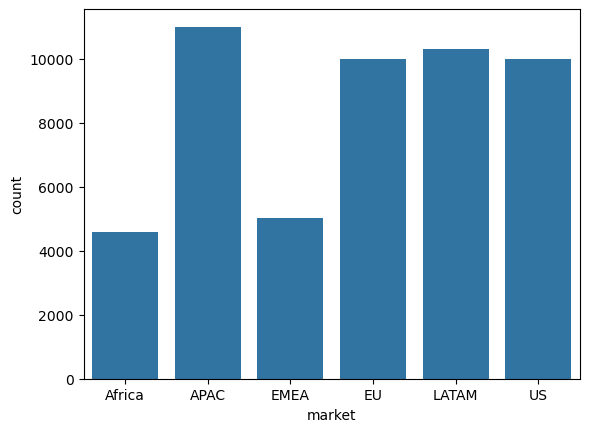

In [40]:
top_market = data["market"].value_counts().head(6).index
sn.countplot(data=data[data["market"].isin(top_market)], x="market")
plt.show()


## region

In [46]:
data["region"].info

<bound method Series.info of 0         Africa
1        Oceania
2           EMEA
3          North
4        Oceania
          ...   
51285       West
51286     Africa
51287    Central
51288      North
51289       West
Name: region, Length: 51290, dtype: object>

In [48]:
data["region"].isnull().sum()

0

In [50]:
data["region"].duplicated().sum()

51277

In [54]:
data["region"].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [58]:
data["region"].describe(include='all')

count       51290
unique         13
top       Central
freq        11117
Name: region, dtype: object

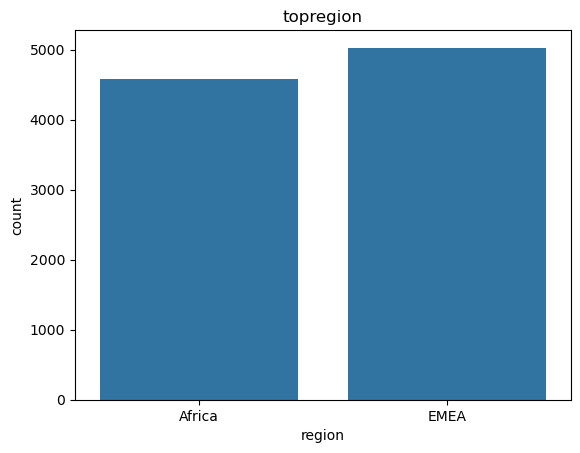

In [64]:
top_region=data["region"].value_counts().head(6).index
sn.countplot(data=data[data["region"].isin(top_market)], x="region")
plt.title("topregion")
plt.show()



In [66]:
data["market"].count()

51290

## category

In [69]:
data["category"].info

<bound method Series.info of 0        Office Supplies
1        Office Supplies
2        Office Supplies
3        Office Supplies
4              Furniture
              ...       
51285    Office Supplies
51286    Office Supplies
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: category, Length: 51290, dtype: object>

In [71]:
data["category"].unique

<bound method Series.unique of 0        Office Supplies
1        Office Supplies
2        Office Supplies
3        Office Supplies
4              Furniture
              ...       
51285    Office Supplies
51286    Office Supplies
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: category, Length: 51290, dtype: object>

In [73]:
data["category"].isnull().sum()

0

In [77]:
data["category"].duplicated().sum()

51287

In [79]:
data["category"].describe(include='all')

count               51290
unique                  3
top       Office Supplies
freq                31273
Name: category, dtype: object

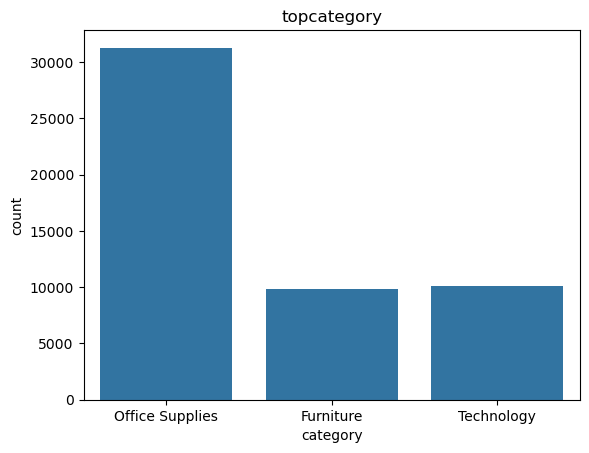

In [89]:
top_category=data["category"].value_counts().head(6).index
sn.countplot(data=data[data["category"].isin(top_category)], x="category")
plt.title("topcategory")
plt.show()

## sub_category

In [6]:
data["sub_category"].info

<bound method Series.info of 0            Storage
1           Supplies
2            Storage
3              Paper
4        Furnishings
            ...     
51285        Binders
51286        Binders
51287         Labels
51288         Labels
51289      Fasteners
Name: sub_category, Length: 51290, dtype: object>

In [8]:
data["sub_category"].isnull().sum()

0

In [14]:
data["sub_category"].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [18]:
data["sub_category"].describe(include=all)

count       51290
unique         17
top       Binders
freq         6152
Name: sub_category, dtype: object

In [20]:
data["sub_category"].value_counts()

sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [42]:
def drawplot(col):
    plt.figure(figsize=(4,3))
    sn.countplot(data= data, x = col, palette='plasma')
    plt.xticks(rotation='vertical')
    plt.show()

In [44]:
toview = ["sub_category","category"]

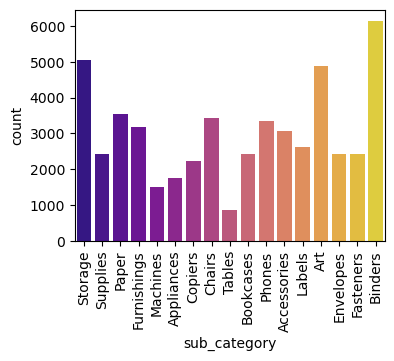

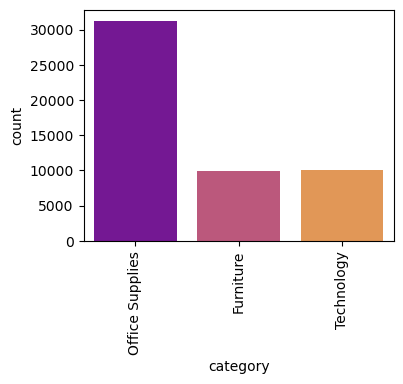

In [48]:
for col in toview:
    drawplot(col)

## product_name

In [51]:
data["product_name"].info

<bound method Series.info of 0                                    Tenex Lockers, Blue
1                               Acme Trimmer, High Speed
2                                Tenex Box, Single Width
3                            Enermax Note Cards, Premium
4                             Eldon Light Bulb, Duo Pack
                              ...                       
51285    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl
51286            Wilson Jones Hole Reinforcements, Clear
51287             Hon Color Coded Labels, 5000 Label Set
51288             Hon Legal Exhibit Labels, Alphabetical
51289                                Bagged Rubber Bands
Name: product_name, Length: 51290, dtype: object>

In [55]:
data["product_name"].unique().sum()

'Tenex Lockers, BlueAcme Trimmer, High SpeedTenex Box, Single WidthEnermax Note Cards, PremiumEldon Light Bulb, Duo PackEaton Computer Printout Paper, 8.5 x 11Okidata Inkjet, WirelessHoover Microwave, WhiteHewlett Wireless Fax, LaserNovimex Swivel Stool, Set of TwoTenex Lockers, IndustrialChromcraft Round Table, Adjustable HeightDania Corner Shelving, TraditionalHewlett Fax and Copier, LaserHon Rocking Chair, Set of TwoNokia Headset, VoIPBreville Coffee Grinder, BlackBelkin Numeric Keypad, BluetoothSAFCO Chairmat, BlackSmead File Cart, BlueAvery Color Coded Labels, Laser Printer CompatibleBIC Sketch Pad, Water ColorRogers Folders, IndustrialStiletto Scissors, SerratedCameo Interoffice Envelope, Set of 50Stockwell Staples, MetalAdvantus Rubber Bands, MetalDania Classic Bookcase, PineEnermax Keyboard, BluetoothJiffy Interoffice Envelope, Set of 50Binney & Smith Sketch Pad, Easy-EraseFiskars Letter Opener, Easy GripSharp Ink, LaserMemorex Mouse, USBKraft Peel and Seal, RecycledBoston Mark

In [59]:
data["product_name"].duplicated().sum()

47502

In [61]:
data["product_name"].describe(include=all)

count       51290
unique       3788
top       Staples
freq          227
Name: product_name, dtype: object

In [63]:
data["product_name"].isnull().sum()

0

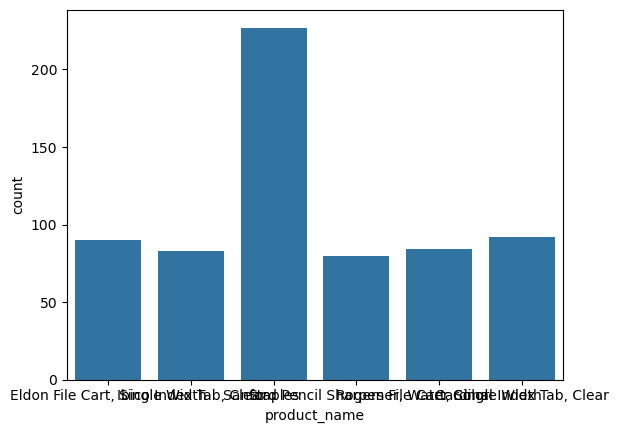

In [67]:
top_product = data["product_name"].value_counts().head(6).index
sn.countplot(data=data[data["product_name"].isin(top_product)], x="product_name")
plt.show()

## sales

In [72]:
data["sales"].info

<bound method Series.info of 0        408
1        120
2         66
3         45
4        114
        ... 
51285     14
51286      4
51287     26
51288      7
51289      3
Name: sales, Length: 51290, dtype: object>

In [74]:
data["sales"].head(5)

0    408
1    120
2     66
3     45
4    114
Name: sales, dtype: object

In [96]:
data["sales"] = data["sales"].str.replace(",", "").astype(int)   


In [ ]:
##  datatype change

In [98]:
data["sales"].info

<bound method Series.info of 0        408
1        120
2         66
3         45
4        114
        ... 
51285     14
51286      4
51287     26
51288      7
51289      3
Name: sales, Length: 51290, dtype: int32>

In [100]:
data["sales"].isnull().sum()

0

In [102]:
data["sales"].unique()

array([ 408,  120,   66, ..., 1763, 1821, 1831])

In [104]:
data["sales"].describe(include=all)

count    51290.000000
mean       246.498440
std        487.567175
min          0.000000
25%         31.000000
50%         85.000000
75%        251.000000
max      22638.000000
Name: sales, dtype: float64

In [106]:
numeric_data = data.select_dtypes(include=['number'])


In [108]:
numeric_data

,sales,quantity,discount,profit,shipping_cost,year
0,408,2,0.0,106.1400,35.46,2011
1,120,3,0.1,36.0360,9.72,2011
2,66,4,0.0,29.6400,8.17,2011
3,45,3,0.5,-26.0550,4.82,2011
4,114,5,0.1,37.7700,4.70,2011
...,...,...,...,...,...,...
51285,14,2,0.2,4.5188,0.89,2014
51286,4,1,0.0,0.4200,0.49,2014
51287,26,3,0.0,12.3600,0.35,2014
51288,7,1,0.0,0.5600,0.20,2014


In [112]:
plt.figure(figsize=(10,7))
sn.heatmap(numeric_data.corr(), annot=True, cmap='plasma')

<Axes: >

## quantity

In [117]:
data["quantity"].info

<bound method Series.info of 0        2
1        3
2        4
3        3
4        5
        ..
51285    2
51286    1
51287    3
51288    1
51289    3
Name: quantity, Length: 51290, dtype: int64>

In [119]:
data["quantity"].head()

0    2
1    3
2    4
3    3
4    5
Name: quantity, dtype: int64

In [121]:
data["quantity"].unique()

array([ 2,  3,  4,  5,  1,  7,  6,  8,  9, 10, 11, 12, 14, 13],
      dtype=int64)

In [123]:
data["quantity"].describe(include=all)

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: quantity, dtype: float64

In [125]:
data["quantity"].value_counts()

quantity
2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: count, dtype: int64

In [127]:
data["quantity"].duplicated().sum()

51276

In [129]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011


## Discount

In [6]:
data["discount"].info

<bound method Series.info of 0        0.0
1        0.1
2        0.0
3        0.5
4        0.1
        ... 
51285    0.2
51286    0.0
51287    0.0
51288    0.0
51289    0.2
Name: discount, Length: 51290, dtype: float64>

In [8]:
data["discount"].isnull().sum()

0

In [12]:
data["discount"].duplicated().sum()

51263

In [14]:
data["discount"].unique()

array([0.   , 0.1  , 0.5  , 0.4  , 0.45 , 0.55 , 0.47 , 0.002, 0.6  ,
       0.2  , 0.8  , 0.17 , 0.25 , 0.7  , 0.402, 0.35 , 0.27 , 0.15 ,
       0.37 , 0.65 , 0.3  , 0.07 , 0.602, 0.32 , 0.202, 0.57 , 0.85 ])

In [16]:
data["discount"].value_counts()

discount
0.000    29009
0.200     4998
0.100     4068
0.400     3177
0.600     2006
0.700     1786
0.500     1633
0.170      735
0.470      725
0.150      541
0.002      461
0.270      388
0.300      340
0.450      327
0.800      316
0.250      198
0.070      150
0.350      122
0.402      104
0.370       74
0.202       41
0.320       27
0.602       23
0.650       17
0.570       12
0.550       10
0.850        2
Name: count, dtype: int64

In [18]:
data["discount"].describe(include=all)

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: discount, dtype: float64

 ## profit

In [21]:
data["profit"].info

<bound method Series.info of 0        106.1400
1         36.0360
2         29.6400
3        -26.0550
4         37.7700
           ...   
51285      4.5188
51286      0.4200
51287     12.3600
51288      0.5600
51289     -0.6048
Name: profit, Length: 51290, dtype: float64>

In [25]:
data["profit"].unique().sum()

793077.18528

In [29]:
data["profit"].duplicated().sum()

26715

In [31]:
data["profit"].isnull().sum()

0

In [33]:
data["profit"].describe(include=all)

count    51290.000000
mean        28.641740
std        174.424113
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: profit, dtype: float64

In [35]:
data["profit"].value_counts()

profit
 0.0000     668
 4.3200      70
 3.9600      69
 7.9200      67
 2.6400      63
           ... 
-1.3995       1
 37.1400      1
-2.2650       1
-18.4230      1
-0.6048       1
Name: count, Length: 24575, dtype: int64

In [37]:
data["profit"].shape

(51290,)

## shipping_cost

In [40]:
data["shipping_cost"].info

<bound method Series.info of 0        35.46
1         9.72
2         8.17
3         4.82
4         4.70
         ...  
51285     0.89
51286     0.49
51287     0.35
51288     0.20
51289     0.17
Name: shipping_cost, Length: 51290, dtype: float64>

In [42]:
data["shipping_cost"].head()

0    35.46
1     9.72
2     8.17
3     4.82
4     4.70
Name: shipping_cost, dtype: float64

In [46]:
data["shipping_cost"].isnull().sum()

0

In [48]:
data["shipping_cost"].duplicated().sum()

41253

In [50]:
data["shipping_cost"].unique()

array([ 35.46,   9.72,   8.17, ..., 138.18,  86.86,  52.11])

In [52]:
data["shipping_cost"].describe(include=all)

count    51290.000000
mean        26.375915
std         57.296804
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: shipping_cost, dtype: float64

In [54]:
data["shipping_cost"].shape

(51290,)

## order_priority

In [57]:
data["order_priority"].info

<bound method Series.info of 0        Medium
1        Medium
2          High
3          High
4        Medium
          ...  
51285    Medium
51286    Medium
51287    Medium
51288    Medium
51289    Medium
Name: order_priority, Length: 51290, dtype: object>

In [59]:
data["order_priority"].head()

0    Medium
1    Medium
2      High
3      High
4    Medium
Name: order_priority, dtype: object

In [61]:
data["order_priority"].isnull().sum()

0

In [65]:
data["order_priority"].duplicated().sum()

51286

In [69]:
data["order_priority"].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [71]:
data["order_priority"].value_counts()

order_priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

In [73]:
data["order_priority"].describe(include=all)

count      51290
unique         4
top       Medium
freq       29433
Name: order_priority, dtype: object

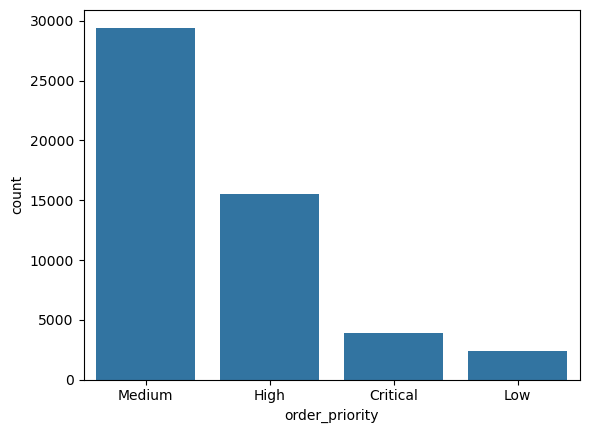

In [75]:
top_order = data["order_priority"].value_counts().index
sn.countplot(data=data[data["order_priority"].isin(top_order)], x="order_priority")
plt.show()

## year

In [78]:
data["year"].info

<bound method Series.info of 0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
51285    2014
51286    2014
51287    2014
51288    2014
51289    2014
Name: year, Length: 51290, dtype: int64>

In [80]:
data["year"].value_counts()

year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

In [82]:
data["year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [86]:
data["year"].isnull().sum()

0

In [90]:
data["year"].duplicated().sum()

51286

In [92]:
data["year"].describe(include=all)

count    51290.000000
mean      2012.777208
std          1.098931
min       2011.000000
25%       2012.000000
50%       2013.000000
75%       2014.000000
max       2014.000000
Name: year, dtype: float64

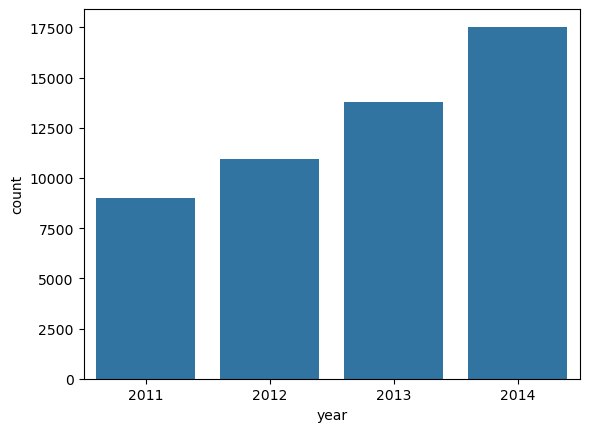

In [94]:
top_year = data["year"].value_counts().index
sn.countplot(data=data[data["year"].isin(top_year)], x="year")
plt.show()